<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

# Import Data

In [5]:
df = pd.read_csv('gold_monthly_csv.csv')
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [6]:
df.shape

(847, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [8]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [9]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [10]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [11]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


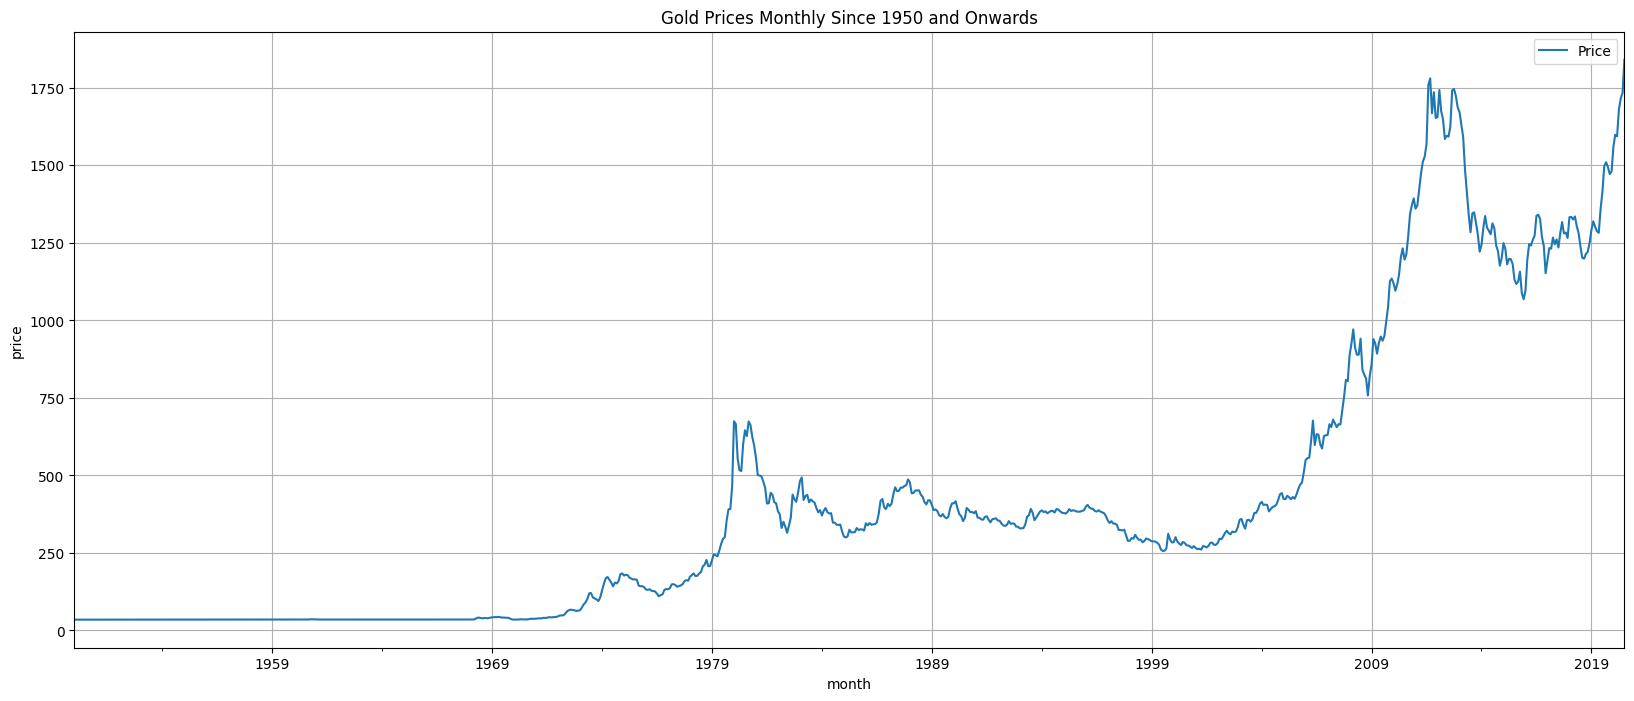

In [12]:
df.plot(figsize = (20,8))
plt.title("Gold Prices Monthly Since 1950 and Onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.grid()
plt.show()

In [13]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


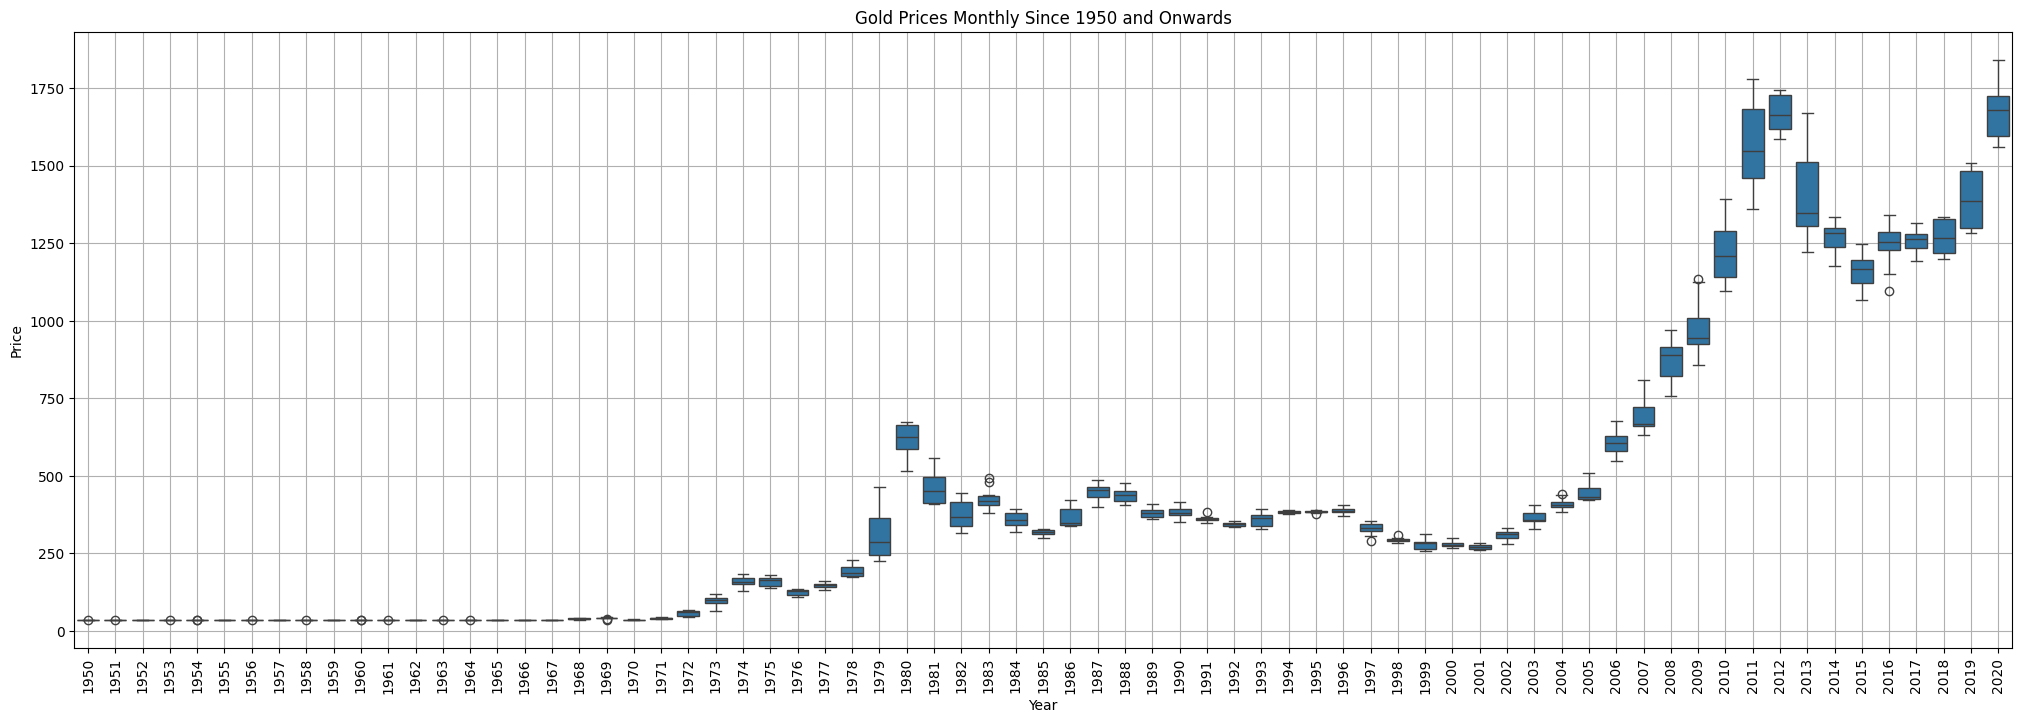

In [14]:
_, ax = plt.subplots(figsize = (25,8))
sns.boxplot (x = df.index.year, y = df.values[:,0], ax = ax)
plt.title("Gold Prices Monthly Since 1950 and Onwards")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

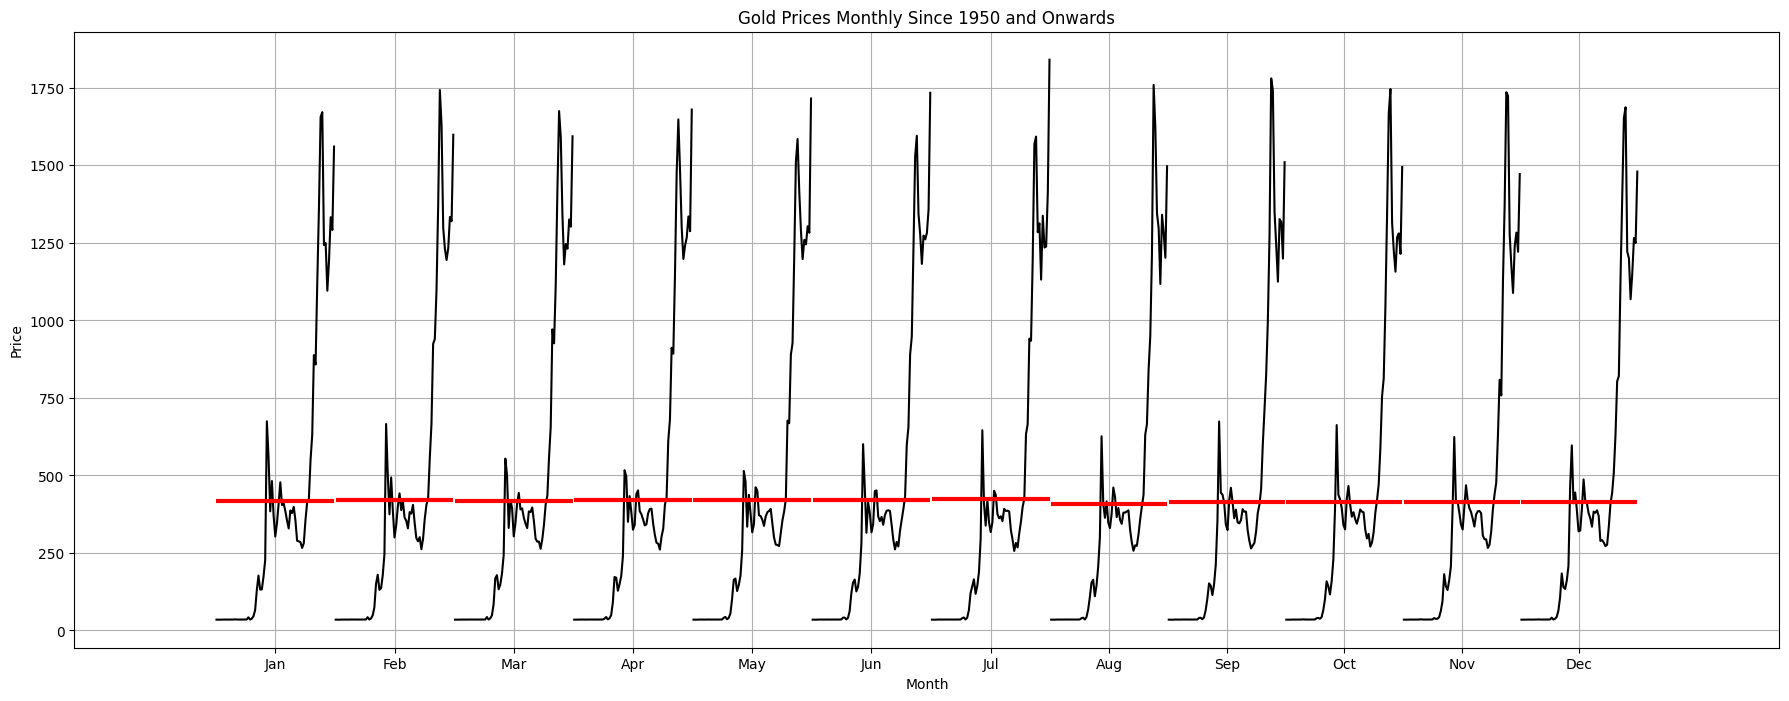

In [15]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22,8))
month_plot(df,ylabel = 'gold price', ax = ax)
plt.title("Gold Prices Monthly Since 1950 and Onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()
plt.show()

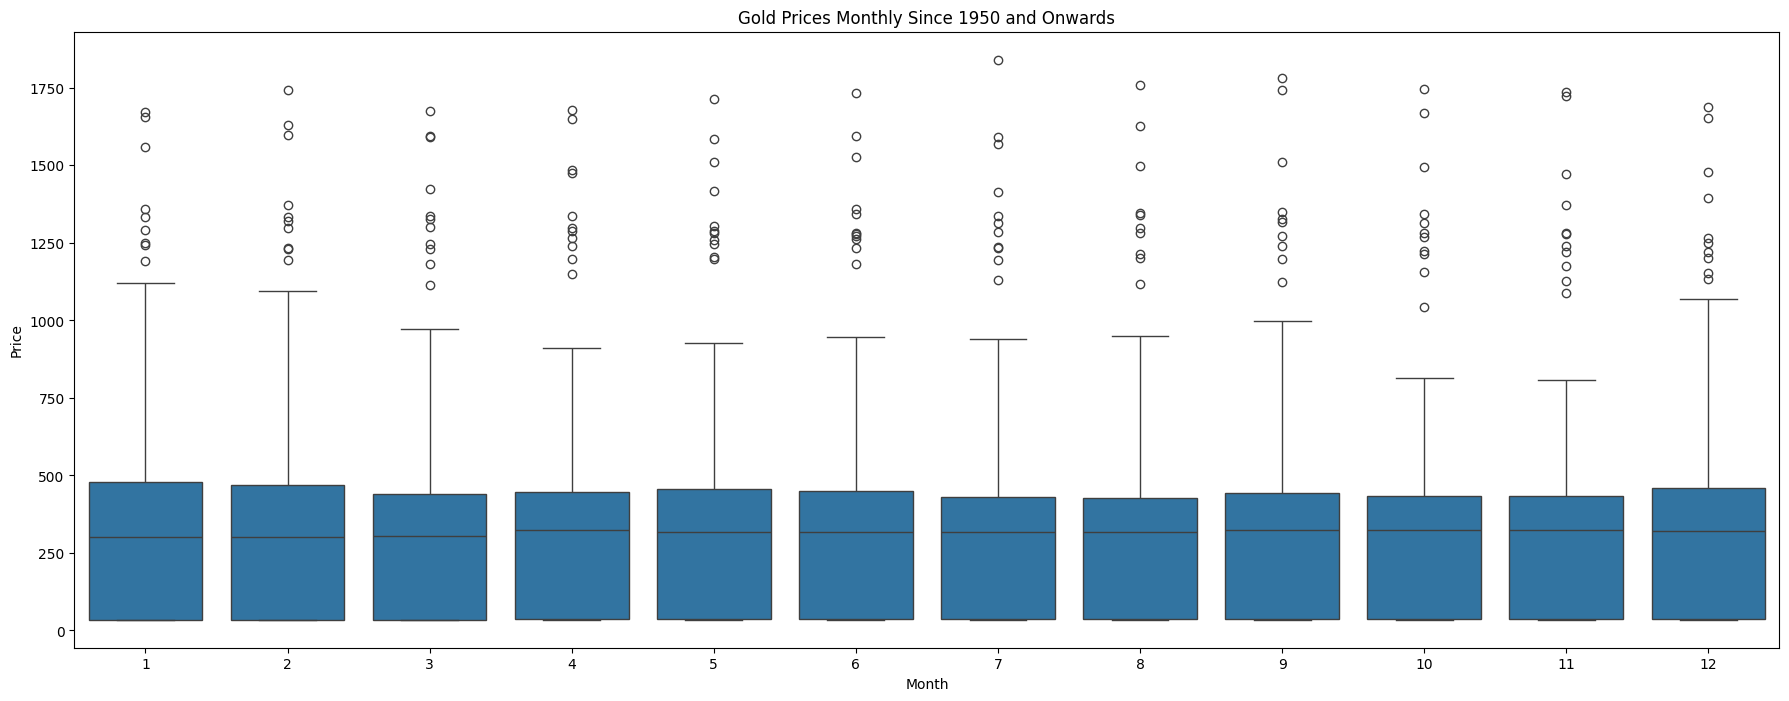

In [16]:
_, ax = plt.subplots(figsize = (22,8))
sns.boxplot (x = df.index.month, y = df.values[:,0], ax = ax)
plt.title("Gold Prices Monthly Since 1950 and Onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

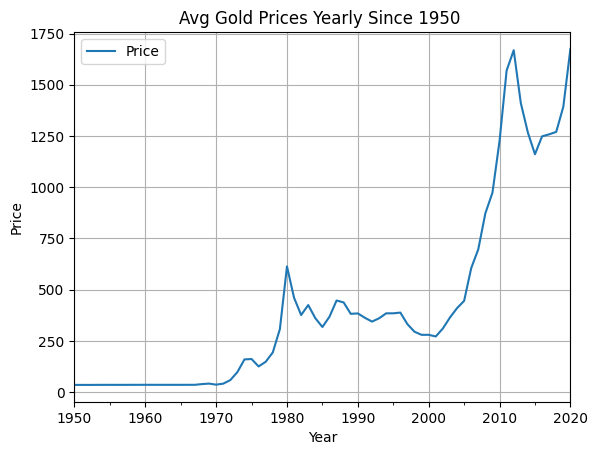

In [17]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Avg Gold Prices Yearly Since 1950 ")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()
plt.show()

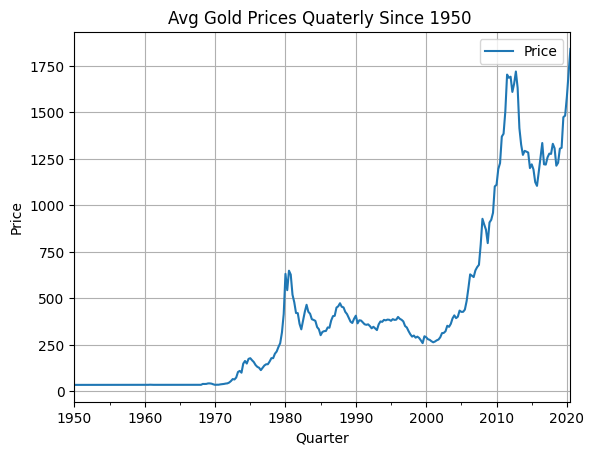

In [18]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title("Avg Gold Prices Quaterly Since 1950 ")
plt.xlabel("Quarter")
plt.ylabel("Price")
plt.grid()
plt.show()

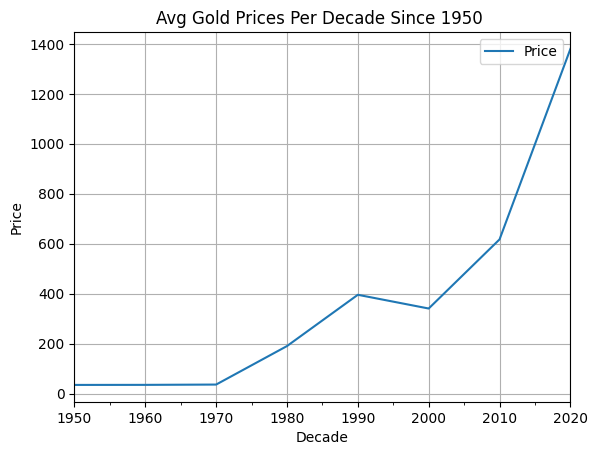

In [19]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Avg Gold Prices Per Decade Since 1950 ")
plt.xlabel("Decade")
plt.ylabel("Price")
plt.grid()
plt.show()

In [20]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}),left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


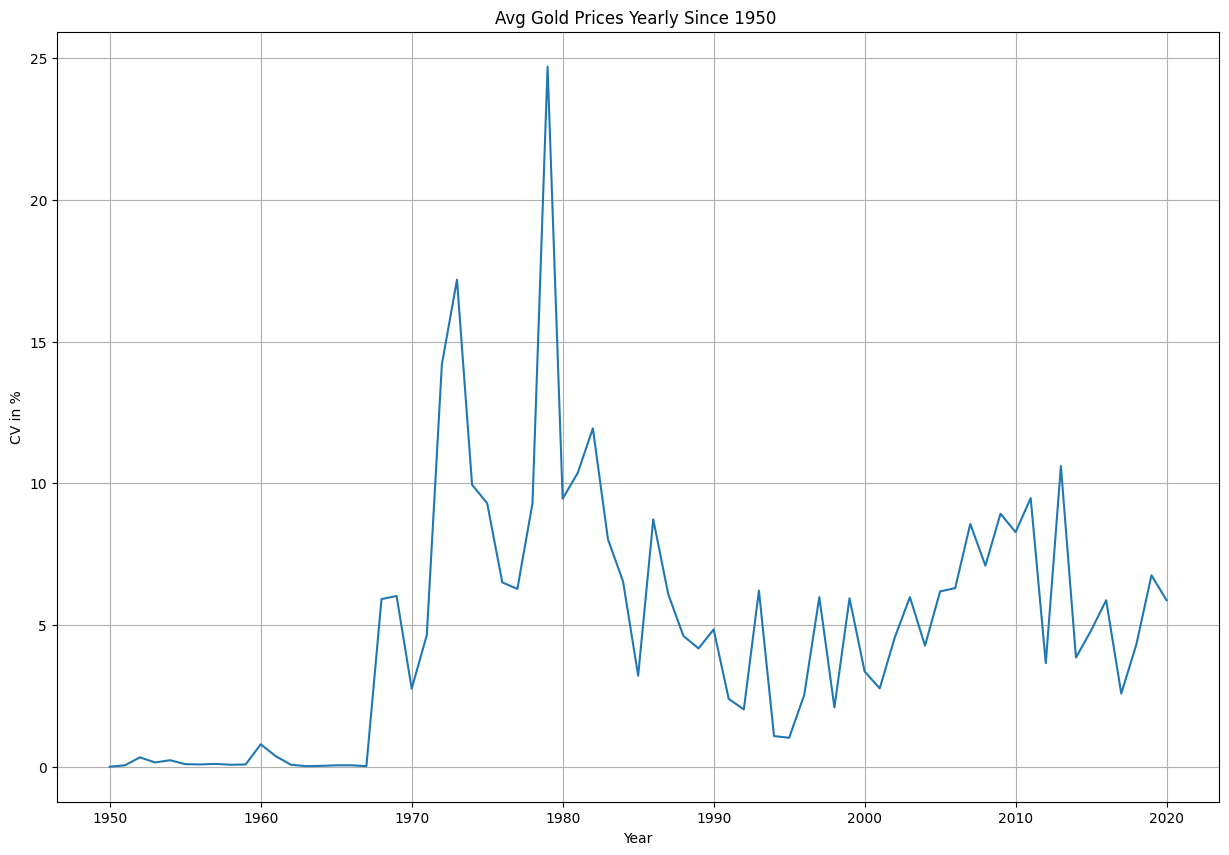

In [21]:
fig, ax =plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot();
plt.title("Avg Gold Prices Yearly Since 1950 ")
plt.xlabel("Year")
plt.ylabel("CV in %")
plt.grid()
plt.show()

In [22]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [23]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


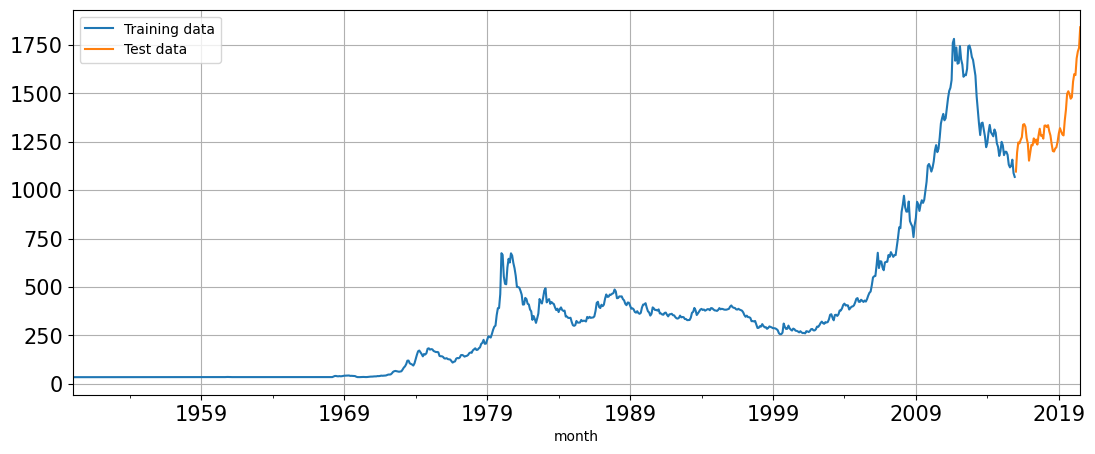

In [24]:
train["Price"].plot(figsize = (13,5), fontsize = 15)
test["Price"].plot(figsize = (13,5), fontsize = 15)
plt.grid()
plt.legend(['Training data', 'Test data'])
plt.show()

In [25]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [26]:
LR_train = train.copy()
LR_test = test.copy()

In [27]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [28]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

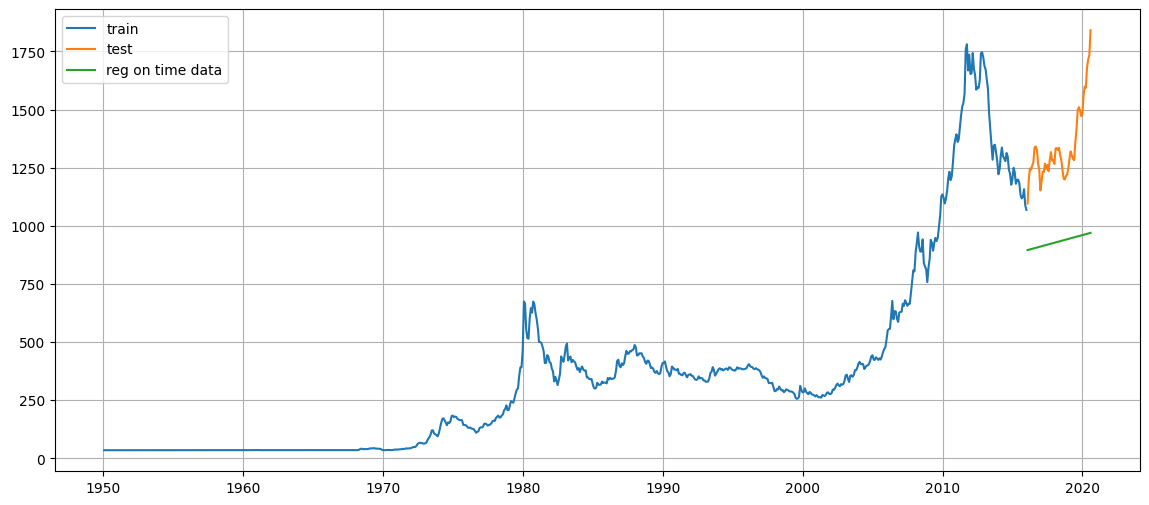

In [29]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'],label = 'train')
plt.plot(test['Price'],label = 'test')
plt.plot(LR_test['forecast'],label = 'reg on time data')
plt.legend(loc = 'best')
plt.grid();
plt.show()

In [30]:
def mape(actual,pred):
    return round ((np.mean(abs(actual - pred)/ actual))*100,2)

In [31]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [32]:
results = pd.DataFrame ({'Test Mape (%)' : [mape_model1_test]}, index = ['RegressionOnTime'])
results

,Test Mape (%)
RegressionOnTime,29.76


In [33]:
Naive_train = train.copy()
Naive_test = test.copy()

In [34]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

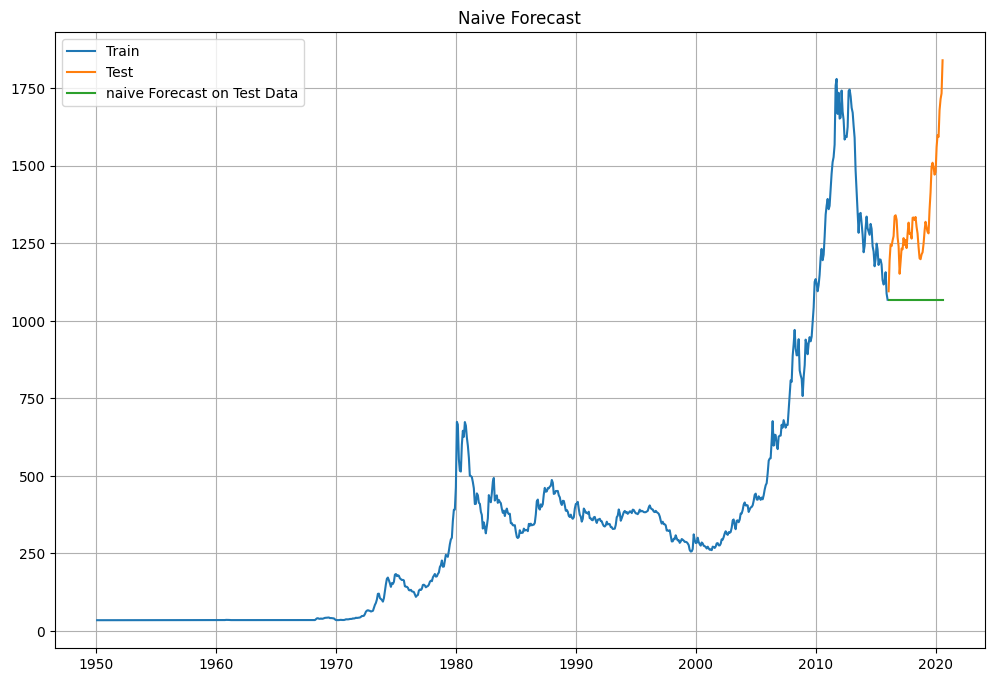

In [35]:
plt.figure(figsize = (12,8))
plt.plot(Naive_train['Price'],label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'naive Forecast on Test Data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid();
plt.show()

In [36]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive Forecast on Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

For Naive Forecast on Test Data, MAPE is 19.380 %


In [37]:
resultsDF_2 = pd.DataFrame ({'Test Mape (%)' : [mape_model2_test]}, index = ['NaiveModel'])
results = pd.concat([results,resultsDF_2])
results

,Test Mape (%)
RegressionOnTime,29.76
NaiveModel,19.38


In [39]:
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                 seasonal = 'additive').fit(smoothing_level = 0.4,
                                                           smoothing_trend = 0.3,
                                                           smoothing_seasonal = 0.6)

In [41]:
Mape_final_model = mape(df['Price'].values,final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [42]:
predictions = final_model.forecast(steps = len(test))

In [46]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof =1),
                       'prediction': predictions,
                       'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof =1)})

pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


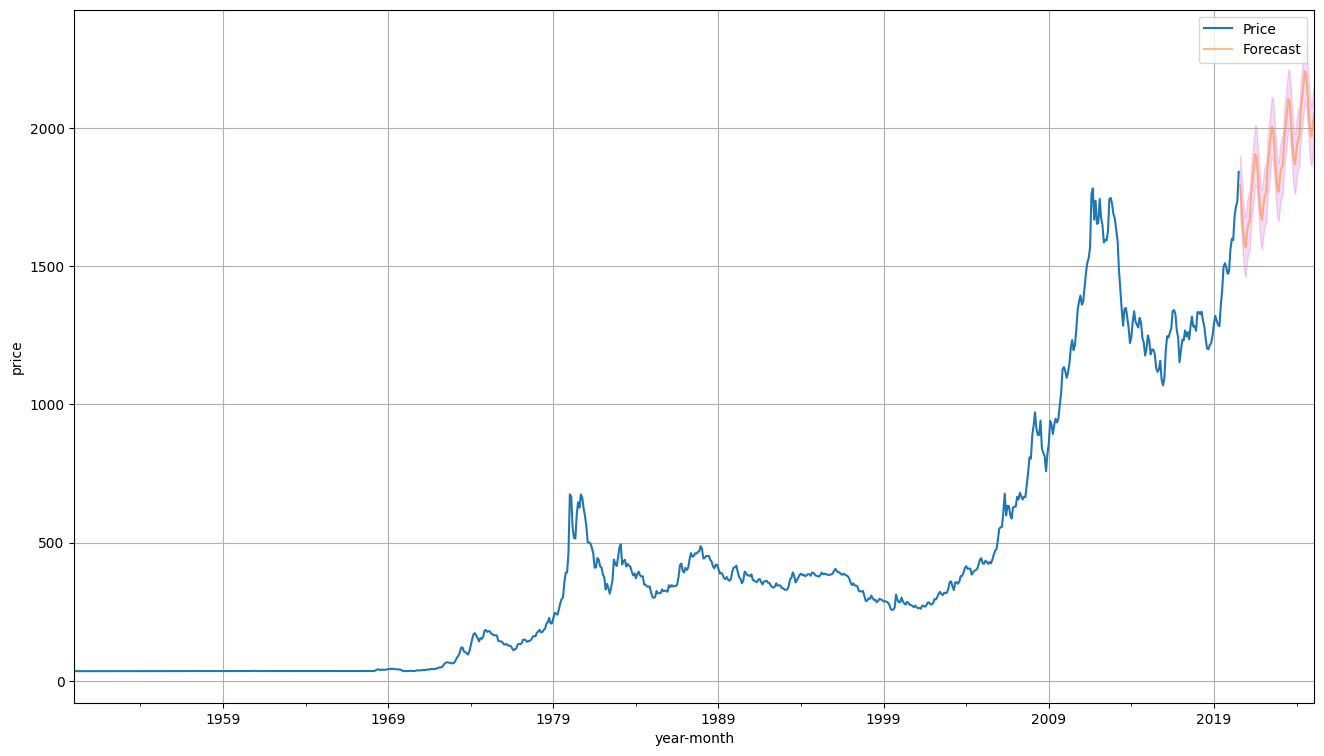

In [53]:
axis = df.plot(label = 'Actual',figsize = (16,9))
pred_df['prediction'].plot(ax = axis,label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color = 'm',alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()

<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
